In [41]:
# Установка transformers
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [42]:
import pandas as pd
from itertools import groupby

In [43]:
#import необходимых модулей

import pandas as pd
#from ludwig.api import LudwigModel
#from ludwig.visualize import learning_curves
import yaml
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.utils.class_weight import compute_class_weight

import numpy as np
from datetime import datetime, timedelta

#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 10, 5
#графики в svg выглядят более четкими
import xgboost as xgb
from xgboost import plot_importance, plot_tree

In [44]:
#Считывание данных в DataFrame 

train= pd.read_csv('train_cluster.csv', sep=';', index_col=None)
test= pd.read_csv('test_cluster.csv', sep=';', index_col=None)

In [45]:
train

,id,Код подразделения,type,Задания кластер,Задания центр,Образование,Специальность,Табельный номер руководителя,Обучений количество,Звонки кластер,...,Опоздания кластер,Опоздания центр,Будни Нет опоздания Время опозданий,Рабочее время кластер,Рабочее время центр,Компьютер кластер,Компьютер центр,Активность кластер,Активность центр,Виды документов
0,ОРГ1-02050,ОРГ1,2,7.0,0.457321,"Высшее образование - бакалавриат, Неполное выс...",Технологические машины и оборудование,не указано,2.0,1.0,...,7.0,0.792786,0.042881,1.0,0.048544,1.0,0.370305,3.0,1.658982,Приказ
1,ОРГ1-02783,ОРГ1,2,1.0,0.663071,Высшее образование,Автоматизация технологических процессов и прои...,ОРГ1-01974,1.0,1.0,...,7.0,0.808182,0.091828,NaN,NaN,1.0,0.947611,3.0,1.411283,"Служебная записка, Файл"
2,ОРГ2-06173,ОРГ2,0,NaN,NaN,Высшее образование,Управление качеством,ОРГ2-01170,1.0,NaN,...,4.0,1.372025,0.533602,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ОРГ2-05359,ОРГ2,2,NaN,NaN,Среднее профессиональное образование,Технолог-сварщик,ОРГ2-09100,1.0,NaN,...,7.0,1.053592,0.106454,NaN,NaN,2.0,0.413357,1.0,0.851213,NaN
4,ОРГ1-00803,ОРГ1,2,4.0,1.159688,Высшее образование,Журналистика,не указано,1.0,1.0,...,3.0,0.648211,0.000000,NaN,NaN,8.0,0.602660,2.0,1.328783,"Служебная записка, Файл"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
545,ОРГ1-02587,ОРГ1,2,2.0,0.653674,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4.0,0.898312,7.0,1.905130,"Служебная записка, Файл"
546,ОРГ1-02383,ОРГ1,2,2.0,0.735304,Высшее образование,"Проектирование, сооружение и эксплуатация газо...",не указано,1.0,2.0,...,2.0,1.302648,0.669084,6.0,0.371077,4.0,0.802069,1.0,1.524088,"Служебная записка, Файл"
547,ОРГ1-02862,ОРГ1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,6.0,1.205473,1.0,1.173048,NaN
548,ОРГ1-00471,ОРГ1,2,1.0,1.129684,"Высшее образование, не указано","сооружение газонефтепроводов, газохранилищ и н...",не указано,2.0,2.0,...,4.0,1.297791,0.147322,NaN,NaN,3.0,1.033237,6.0,1.008928,"Распоряжение, Служебная записка"


In [46]:
test

,id,Код подразделения,type,Задания кластер,Задания центр,Образование,Специальность,Табельный номер руководителя,Обучений количество,Звонки кластер,...,Опоздания кластер,Опоздания центр,Будни Нет опоздания Время опозданий,Рабочее время кластер,Рабочее время центр,Компьютер кластер,Компьютер центр,Активность кластер,Активность центр,Виды документов
0,ОРГ1-02649,ОРГ1,0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,7.0,0.384645,1.0,0.708714,3.0,1.557715,NaN
1,ОРГ2-05929,ОРГ2,0,NaN,NaN,Высшее образование - бакалавриат,Инженерно-геодезическое обеспечение и техничес...,ОРГ2-00539,1.0,NaN,...,7.0,0.833921,0.173267,NaN,NaN,3.0,0.930472,7.0,1.379259,NaN
2,ОРГ2-05859,ОРГ2,0,7.0,1.087509,Среднее общее образование,не указано,ОРГ2-04561,1.0,NaN,...,1.0,1.185085,4.935355,NaN,NaN,5.0,1.201870,8.0,1.116911,"Входящий, Служебная записка"
3,ОРГ1-00279,ОРГ1,0,1.0,0.358147,"Высшее образование, Повышение квалификации","Промышленное и гражданское строительство, не у...",ОРГ1-00483,2.0,4.0,...,7.0,0.485092,0.344013,8.0,0.737975,1.0,1.201789,8.0,1.544001,"Служебная записка, Файл"
4,ОРГ2-01613,ОРГ2,0,10.0,1.106459,"Высшее образование - специалитет, магистратура",Промышленное и гражданское строительство,ОРГ2-02458,1.0,NaN,...,7.0,1.175586,2.227617,NaN,NaN,3.0,1.057278,3.0,1.001176,"Входящий, Распоряжение"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,ОРГ1-02893,ОРГ1,0,7.0,0.457198,Среднее профессиональное образование,Менеджмент,не указано,1.0,1.0,...,8.0,1.207824,1.517479,NaN,NaN,2.0,0.995992,1.0,0.792806,"Распоряжение, Служебная записка"
258,ОРГ2-01077,ОРГ2,0,7.0,1.605161,"Высшее образование - специалитет, магистратура",Астрономогеодезия,ОРГ2-09100,1.0,NaN,...,4.0,1.634936,0.951791,NaN,NaN,4.0,1.240152,3.0,2.436821,"Приказ, Служебная записка"
259,ОРГ1-00469,ОРГ1,0,1.0,0.555824,Высшее образование,Менеджмент организации,ОРГ1-01974,1.0,8.0,...,7.0,0.768754,0.046140,7.0,0.337214,1.0,1.274786,3.0,1.014967,"Служебная записка, Файл"
260,ОРГ1-02060,ОРГ1,0,7.0,1.608024,Высшее образование,"Проектирование, сооружение и эксплуатация газо...",не указано,1.0,1.0,...,3.0,0.792935,0.030736,NaN,NaN,8.0,0.671345,2.0,1.223393,"Служебная записка, Файл"


In [47]:
# Замена Null
train=train.fillna(0)
test=test.fillna(0)
train.loc[(train['Образование']==0),'Образование']='Неизвестно'
train.loc[(train['Специальность']==0),'Специальность']='Неизвестно'
test.loc[(test['Образование']==0),'Образование']='Неизвестно'
test.loc[(test['Специальность']==0),'Специальность']='Неизвестно'

In [48]:
train.columns

Index(['id', 'Код подразделения', 'type', 'Задания кластер', 'Задания центр',
       'Образование', 'Специальность', 'Табельный номер руководителя',
       'Обучений количество', 'Звонки кластер', 'Звонки центр',
       'Опоздания кластер', 'Опоздания центр',
       'Будни Нет опоздания Время опозданий', 'Рабочее время кластер',
       'Рабочее время центр', 'Компьютер кластер', 'Компьютер центр',
       'Активность кластер', 'Активность центр', 'Виды документов'],
      dtype='object')

In [49]:
column_names_to_train =['Код подразделения',  'Задания кластер', 'Задания центр',
       #'Образование', 'Специальность', 
       'Обучений количество', 'Звонки кластер', 'Звонки центр',
       'Опоздания кластер', 'Рабочее время кластер', 'Компьютер кластер',
       'Опоздания центр', 'Активность кластер', 'Рабочее время центр','Табельный номер руководителя',
       'Компьютер центр', 'Активность центр','Будни Нет опоздания Время опозданий'
]


In [50]:
# бинаризируем поля трейна, категория 2= 1, остальные =0
train['Category']=0
train.loc[(train['type']==2),'Category']=1
train['Category'].value_counts()

1    298
0    252
Name: Category, dtype: int64

In [51]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 22 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   550 non-null    object 
 1   Код подразделения                    550 non-null    object 
 2   type                                 550 non-null    int64  
 3   Задания кластер                      550 non-null    float64
 4   Задания центр                        550 non-null    float64
 5   Образование                          550 non-null    object 
 6   Специальность                        550 non-null    object 
 7   Табельный номер руководителя         550 non-null    object 
 8   Обучений количество                  550 non-null    float64
 9   Звонки кластер                       550 non-null    float64
 10  Звонки центр                         550 non-null    float64
 11  Опоздания кластер               

In [52]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262 entries, 0 to 261
Data columns (total 21 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   262 non-null    object 
 1   Код подразделения                    262 non-null    object 
 2   type                                 262 non-null    int64  
 3   Задания кластер                      262 non-null    float64
 4   Задания центр                        262 non-null    float64
 5   Образование                          262 non-null    object 
 6   Специальность                        262 non-null    object 
 7   Табельный номер руководителя         262 non-null    object 
 8   Обучений количество                  262 non-null    float64
 9   Звонки кластер                       262 non-null    float64
 10  Звонки центр                         262 non-null    float64
 11  Опоздания кластер               

In [53]:
train_all=pd.concat([train, test])
train_all

,id,Код подразделения,type,Задания кластер,Задания центр,Образование,Специальность,Табельный номер руководителя,Обучений количество,Звонки кластер,...,Опоздания центр,Будни Нет опоздания Время опозданий,Рабочее время кластер,Рабочее время центр,Компьютер кластер,Компьютер центр,Активность кластер,Активность центр,Виды документов,Category
0,ОРГ1-02050,ОРГ1,2,7.0,0.457321,"Высшее образование - бакалавриат, Неполное выс...",Технологические машины и оборудование,не указано,2.0,1.0,...,0.792786,0.042881,1.0,0.048544,1.0,0.370305,3.0,1.658982,Приказ,1.0
1,ОРГ1-02783,ОРГ1,2,1.0,0.663071,Высшее образование,Автоматизация технологических процессов и прои...,ОРГ1-01974,1.0,1.0,...,0.808182,0.091828,0.0,0.000000,1.0,0.947611,3.0,1.411283,"Служебная записка, Файл",1.0
2,ОРГ2-06173,ОРГ2,0,0.0,0.000000,Высшее образование,Управление качеством,ОРГ2-01170,1.0,0.0,...,1.372025,0.533602,0.0,0.000000,0.0,0.000000,0.0,0.000000,0,0.0
3,ОРГ2-05359,ОРГ2,2,0.0,0.000000,Среднее профессиональное образование,Технолог-сварщик,ОРГ2-09100,1.0,0.0,...,1.053592,0.106454,0.0,0.000000,2.0,0.413357,1.0,0.851213,0,1.0
4,ОРГ1-00803,ОРГ1,2,4.0,1.159688,Высшее образование,Журналистика,не указано,1.0,1.0,...,0.648211,0.000000,0.0,0.000000,8.0,0.602660,2.0,1.328783,"Служебная записка, Файл",1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,ОРГ1-02893,ОРГ1,0,7.0,0.457198,Среднее профессиональное образование,Менеджмент,не указано,1.0,1.0,...,1.207824,1.517479,0.0,0.000000,2.0,0.995992,1.0,0.792806,"Распоряжение, Служебная записка",NaN
258,ОРГ2-01077,ОРГ2,0,7.0,1.605161,"Высшее образование - специалитет, магистратура",Астрономогеодезия,ОРГ2-09100,1.0,0.0,...,1.634936,0.951791,0.0,0.000000,4.0,1.240152,3.0,2.436821,"Приказ, Служебная записка",NaN
259,ОРГ1-00469,ОРГ1,0,1.0,0.555824,Высшее образование,Менеджмент организации,ОРГ1-01974,1.0,8.0,...,0.768754,0.046140,7.0,0.337214,1.0,1.274786,3.0,1.014967,"Служебная записка, Файл",NaN
260,ОРГ1-02060,ОРГ1,0,7.0,1.608024,Высшее образование,"Проектирование, сооружение и эксплуатация газо...",не указано,1.0,1.0,...,0.792935,0.030736,0.0,0.000000,8.0,0.671345,2.0,1.223393,"Служебная записка, Файл",NaN


In [54]:


train_all['Код подразделения']=train_all['Код подразделения'].astype("category").cat.codes
train_all['Задания кластер']=train_all['Задания кластер'].astype("category").cat.codes
train_all['Звонки кластер']=train_all['Звонки кластер'].astype("category").cat.codes
train_all['Опоздания кластер']=train_all['Опоздания кластер'].astype("category").cat.codes
train_all['Рабочее время кластер']=train_all['Рабочее время кластер'].astype("category").cat.codes
train_all['Компьютер кластер']=train_all['Компьютер кластер'].astype("category").cat.codes
train_all['Активность кластер']=train_all['Активность кластер'].astype("category").cat.codes
train_all['Табельный номер руководителя']=train_all['Табельный номер руководителя'].astype("category").cat.codes

#train[column_names_to_linear]=np.log(1+train[column_names_to_linear])

In [55]:
test=test[['id']]
test_all = test.merge(train_all, how='left', on='id')

In [56]:
train=train[['id']]
train_all = train.merge(train_all, how='left', on='id')

In [57]:
# Обучение разделению 
xgb_estimator = xgb.XGBClassifier(
    learning_rate =0.015,
     n_estimators=500,
     max_depth=16,
     min_child_weight=6,
     gamma=0,
     verbosity=2,
     subsample=0.8,
     colsample_bytree=0.8,
     objective= 'binary:hinge',
     nthread=4,
     tree_method='gpu_hist',#,gpu_id=0, 
           #predictor='gpu_predictor',
    enable_categorical=True, 
    use_label_encoder=False,
     max_cat_to_onehot =50,
     eval_metric='error',
     seed=96,
     feature_fraction=0.7,
        scale_pos_weight=0.9)

In [58]:
%%time
# fit first model

xgb_estimator.fit(train_all[column_names_to_train], train_all['Category'])

CPU times: user 3.66 s, sys: 30.8 ms, total: 3.69 s
Wall time: 3.73 s


XGBClassifier(colsample_bytree=0.8, enable_categorical=True,
              eval_metric='error', feature_fraction=0.7, learning_rate=0.015,
              max_cat_to_onehot=50, max_depth=16, min_child_weight=6,
              n_estimators=500, nthread=4, objective='binary:hinge',
              scale_pos_weight=0.9, seed=96, subsample=0.8,
              tree_method='gpu_hist', use_label_encoder=False, verbosity=2)

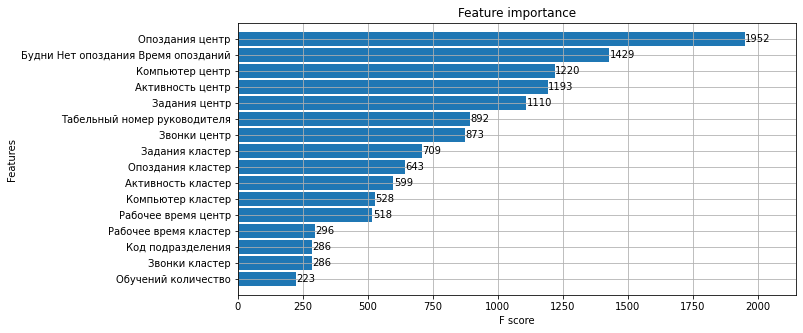

In [59]:
# Важность признаков XGBoost
# 
_ = plot_importance(xgb_estimator, height=0.9)

In [60]:
# Проверка на трейне
predictions = xgb_estimator.predict(train_all[column_names_to_train])

print("Значение метрики recall на трейне : ", recall_score(predictions, train_all['Category'], average='macro', zero_division=True))

Значение метрики recall на трейне :  0.9880747184030143


In [61]:
# проверка на тесте
predictions_fin= xgb_estimator.predict(test_all[column_names_to_train])
test_all['type']=predictions_fin
test_all['type'].value_counts()

1.0    161
0.0    101
Name: type, dtype: int64

In [62]:
test_all.loc[(test_all['type']==1),'type']=2
test_all.loc[(test_all['type']==0),'type']=0

In [63]:
test_itog=test_all[['id','type']]
test_itog['type']=test_itog['type'].astype(int)
test_itog

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,id,type
0,ОРГ1-02649,0
1,ОРГ2-05929,0
2,ОРГ2-05859,2
3,ОРГ1-00279,0
4,ОРГ2-01613,0
...,...,...
257,ОРГ1-02893,2
258,ОРГ2-01077,2
259,ОРГ1-00469,2
260,ОРГ1-02060,2


In [64]:
test_itog.to_csv('Якутия разделение по 2 сид_96_p.csv', sep=',', index=None)

In [65]:
# Перевод поля Category в бинарное по значению 0
train_all['Category']=0
train_all.loc[(train_all['type']==0),'Category']=1
train_all['Category'].value_counts()

0    397
1    153
Name: Category, dtype: int64

In [66]:
# Обучение разделению 
xgb_estimator = xgb.XGBClassifier(
    learning_rate =0.015,
     n_estimators=500,
     max_depth=16,
     min_child_weight=6,
     gamma=0,
     verbosity=2,
     subsample=0.8,
     colsample_bytree=0.8,
     objective= 'binary:hinge',
     nthread=4,
     tree_method='gpu_hist',#,gpu_id=0, 
           #predictor='gpu_predictor',
    enable_categorical=True, 
    use_label_encoder=False,
     max_cat_to_onehot =50,
     eval_metric='error',
     seed=16,
     feature_fraction=0.7,
        scale_pos_weight=4)

In [67]:
%%time
# fit second model

xgb_estimator.fit(train_all[column_names_to_train], train_all['Category'])

CPU times: user 3.38 s, sys: 27.8 ms, total: 3.41 s
Wall time: 3.45 s


XGBClassifier(colsample_bytree=0.8, enable_categorical=True,
              eval_metric='error', feature_fraction=0.7, learning_rate=0.015,
              max_cat_to_onehot=50, max_depth=16, min_child_weight=6,
              n_estimators=500, nthread=4, objective='binary:hinge',
              scale_pos_weight=4, seed=16, subsample=0.8,
              tree_method='gpu_hist', use_label_encoder=False, verbosity=2)

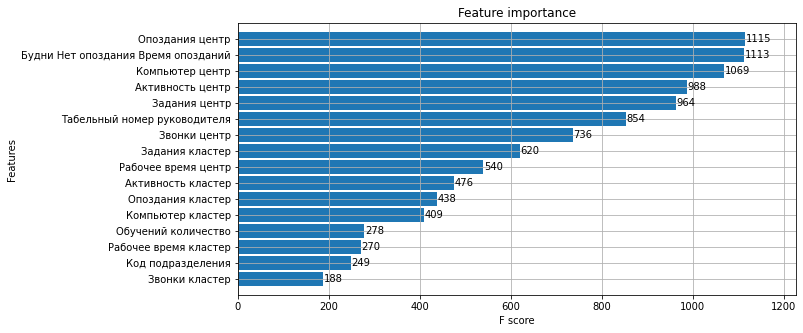

In [68]:
# Важность признаков XGBoost 
_ = plot_importance(xgb_estimator, height=0.9)

In [69]:
# Проверка на трейне
predictions = xgb_estimator.predict(train_all[column_names_to_train])

print("Значение метрики recall на трейне : ", recall_score(predictions, train_all['Category'], average='macro', zero_division=True))

Значение метрики recall на трейне :  0.9950124688279302


In [70]:
_# получаем результаты
predictions_fin= xgb_estimator.predict(test_all[column_names_to_train])
# Заводим результаты в итоговый тест
test_all['Prognoz']=predictions_fin+1
test_all['Prognoz'].value_counts()

1    213
2     49
Name: Prognoz, dtype: int64

In [71]:
test_summ=test_all[['id','Prognoz']]
test_summ.loc[(test_summ['Prognoz']==2),'Prognoz']=0
test_summ['Prognoz'].value_counts()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


1    213
0     49
Name: Prognoz, dtype: int64

In [72]:
test_summ.columns=['id','type']

In [73]:
test_summ['type'].value_counts()

1    213
0     49
Name: type, dtype: int64

In [74]:
# Получаем промежуточный результат после второго разделения
test_summ.to_csv('Якутия разделение по 0 сид_16_p.csv', sep=',', index=None)